# Project - 8  Space Server Dataset


About The Project:-
    
In this project i will try to classify observations of space to be either stars, galaxies or quasars. I will try to have a complete cycle of the data science steps including importing the dataset,Exploratory data analysis,and building machine learning models to predict for new data. I am using data from the Sloan Digital Sky Survey
  


    


About the dataset and features:-
    
In this dataset i will use classification technique to predict and classify the stars,galaxies or quasars.<br>
I will use features of the dataset to build the model to predict the required results mentioned above.<br>
Here are the description of the features present in the dataset:-<br>
1.objid  - Object Identifier<br>
2.ra = J2000 Right Ascension (r-band)<br>
3.dec = J2000 Declination (r-band)<br>
4.u = better of DeV/Exp magnitude fit<br>
5.g = better of DeV/Exp magnitude fit<br>
6.r = better of DeV/Exp magnitude fit<br>
7.i = better of DeV/Exp magnitude fit<br>
8.z = better of DeV/Exp magnitude fit<br>
9.run = Run Number<br>
10.rereun  = Rerun Number<br>
11.camcol  = Camera column<br>
12.field  = Field number<br>
13.specobjid  = Object Identifier<br>
14.class = object class (galaxy, star or quasar object)<br>
15.redshift  = Final Redshift<br>
16.plate  = plate number<br>
17.mjd  = MJD of observation<br>
18.fiberid  = fiber ID
    
After reviewing the features in the dataset i observe that my target columns is class so i will use classification model 
Building technique for train and build the model.<br>



In [74]:
#Importing some important library
import pandas as pd

In [75]:
#Importing the dataset into dataframe df for furthure working
df = pd.read_csv("skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [76]:
#Checking the datatypes of the columns present in the dataset
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

--------------------------------------------------------------------------------------------------------------<br>After obsrving the datatypes of the column present in the dataset i observed that the all columns dataype is int accept of
my target column class which is object. I have to map that column for get more insights from data.

# Exploratory Data Analysis


In [77]:
#This will give the shape of the data
df.shape

(10000, 18)

In [78]:
#This will give the information of dataset like not null columns,count and also datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


---------------------------------------------------------------------------------------------------------------------------<br>
From above observation I observed that there are 10000 not null columns present in the dataset and we have already seen
this while checking the shape that there is 10000 rows available so if all 10000 is not null may be there is ni missing value
present in the dataset. I will see furthue with other methods.

In [79]:
#Checking the missing values present in the dataset and there counts columnwise by this method
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [80]:
#This will give all columns present in the dataset with full name
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [81]:
#Checkin the unique values present in the target column
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [82]:
#This will give you the value counts for each value from our target columns
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [83]:
df_dummy = df #Creating a dummy dataset for removing scintific notaion coming in the result.

<h3>
<font color ="green">
Summary Statistics
<font>
</h3>

In [84]:
#This will give the stastical information of dataset like mean,STD,max,min etc. I will use the information populated.
df_dummy.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,1237649999999842304.00000,175.52999,14.83615,18.61936,17.37193,16.84096,16.58358,16.42283,981.03480,301.00000,3.64870,302.38010,1645021569800003584.00000,0.14373,1460.98640,52943.53330,353.06940
std,157703.88539,47.78344,25.21221,0.82866,0.94546,1.06776,1.14180,1.20319,273.30502,0.00000,1.66618,162.57776,2013998492866906624.00000,0.38877,1788.77837,1511.15065,206.29815
min,1237650000000000000.00000,8.23510,-5.38263,12.98897,12.79955,12.43160,11.94721,11.61041,308.00000,301.00000,1.00000,11.00000,299578000000000000.00000,-0.00414,266.00000,51578.00000,1.00000
25%,1237650000000000000.00000,157.37095,-0.53904,18.17804,16.81510,16.17333,15.85370,15.61829,752.00000,301.00000,2.00000,184.00000,338924750000000000.00000,0.00008,301.00000,51900.00000,186.75000
50%,1237650000000000000.00000,180.39451,0.40417,18.85309,17.49513,16.85877,16.55499,16.38995,756.00000,301.00000,4.00000,299.00000,496658000000000000.00000,0.04259,441.00000,51997.00000,351.00000
75%,1237650000000000000.00000,201.54728,35.64940,19.25923,18.01015,17.51268,17.25855,17.14145,1331.00000,301.00000,5.00000,414.00000,2881300000000000000.00000,0.09258,2559.00000,54468.00000,510.00000
max,1237650000000000000.00000,260.88438,68.54227,19.59990,19.91897,24.80204,28.17963,22.83306,1412.00000,301.00000,6.00000,768.00000,9468830000000000000.00000,5.35385,8410.00000,57481.00000,1000.00000


<font color = "green">
Key Observation:-

1. The count of values is 10000 across all column which we can see, So by this result the information i am getting that there      is no missing value present in the dataset.<br><br>
    
2. Standard deviation is high in the columns like objid ra,dec,run,field,plate,mjd and fiberid. It means the range is possibly    high in these columns.<br><br>
    
3. We can also see that there is huge differences in  min value and max value in the above mentioned columns. So it seems that 
   the data is spread wide and range is high. Possibly the outliers present in the dataset which we will confirm later in data
   visulaization.<br><br>

4. Median is high than mean in columns like objid,ra,camcol and mean is higher than median in columns like fiberid,mjd,plate
   specobjid etc. It suggest that dataset has skewnees which both =ve or -ve. Some columns are ledft skewed and some are right
   skewed.<br><br>
    
5. The difference between maximum and 75 percentile is high in almost all columns which suggest that there must be outliers
   present in the dataset and the databis not normally distributed. Later we will see this by ploting graph.
    
</font>

<h2>
<font color = "green">
Data Visulization
</font>
</h2>


In [85]:
#Importing some important library to see data in visulization form and finding some observation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
#For better understanding i have to change my target variable datatype objeect into label for get more insight.
port = {"STAR":0,"GALAXY":1,"QSO":2}
df['class'] = df['class'].map(port)

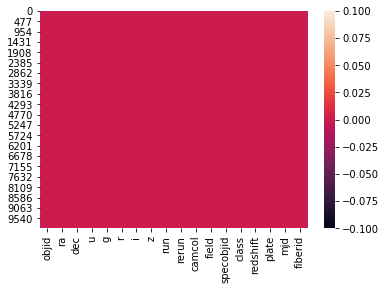

In [87]:
#Checking the missing value present in the dataset by plotting graph which make sure that there is no missing value present
sns.heatmap(df.isnull())

In [88]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

In [89]:
#Checking the corelation of other variables with our target variables
dfcor = df.corr()
dfcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


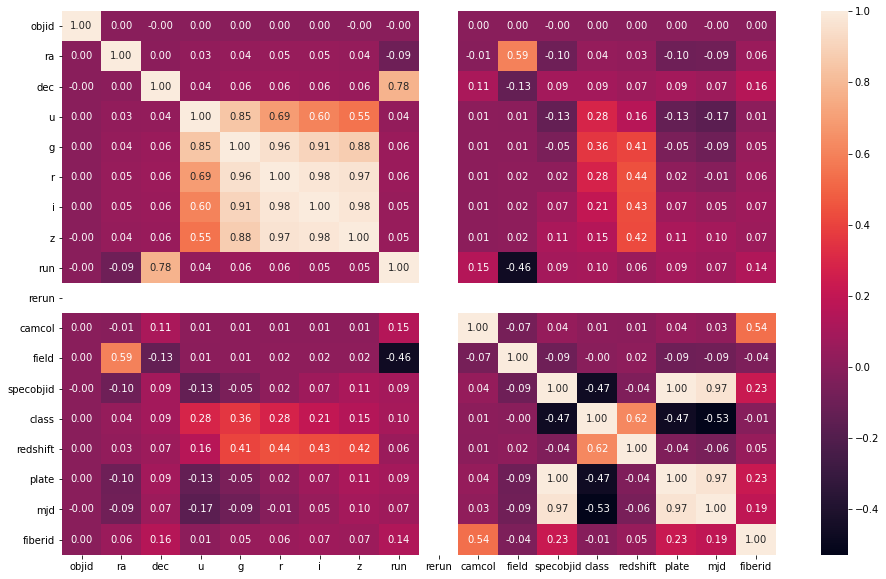

In [90]:
#See tge corelation in heatmap for better visulization
plt.figure(figsize=(16,10))
sns.heatmap(dfcor,annot=True ,fmt='.2f')

From above i observed that the column rerun is showing blank as it is not corelated with other columns as there is only 
one value present across the column which is 301. So it will better to drop this columns for build good model. I will also drop
the column objid and field as it is 0 corelated with other columns as well as my target column.

In [91]:
#droping rerun column
df.drop(["rerun","objid","field"],axis=1,inplace=True)
df.sample() #Checking sample of data to confirm that the column is removed

,ra,dec,u,g,r,i,z,run,camcol,specobjid,class,redshift,plate,mjd,fiberid
1405,226.663995,0.537807,19.33928,17.86101,17.04922,16.61506,16.28878,752,5,3.491800e+17,1,0.092193,310,51990,548


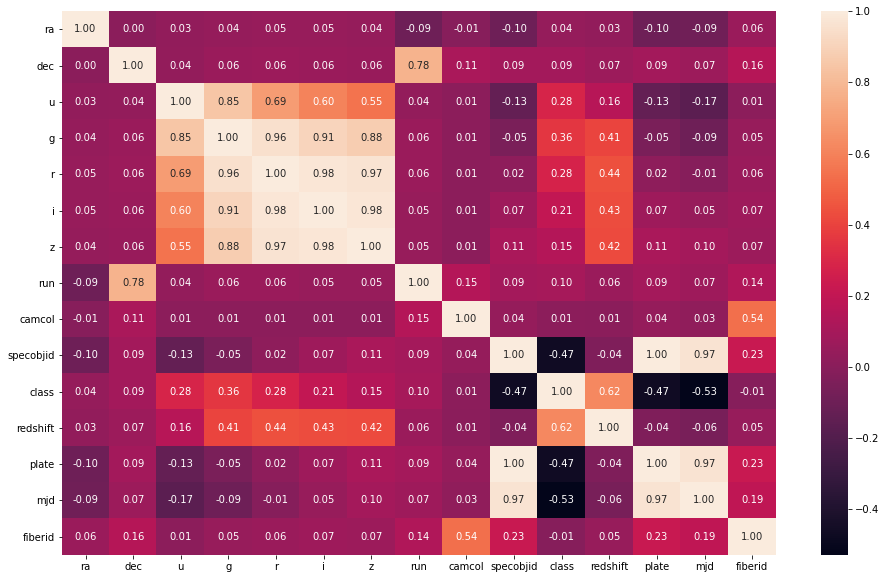

In [92]:
#Now again checkin corelation and try get information.
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True ,fmt='.2f')

Observation:-

1. After observing the corelation of other columns with my target column class there is +ve corelation and -ve corelation
   both are present in the dataset.
   
2. Highest +ve corelated column is redshift where as highest -ve corelated column is mjd.

3. Positive corelated columns are :- redshift,camcol,run,z,i,r,g,u,dec,ra

4. Negative corelated columns are:- mjd,plate,specobjid.

5. There are some columns like camcol,run,ra and dec which is very less corelated with my target varible, however instead of
   drop these columns i will use PCA method to transfrom thsese columns to usefule for my model building.

Text(0.5, 1.0, 'Corelation With target variables')

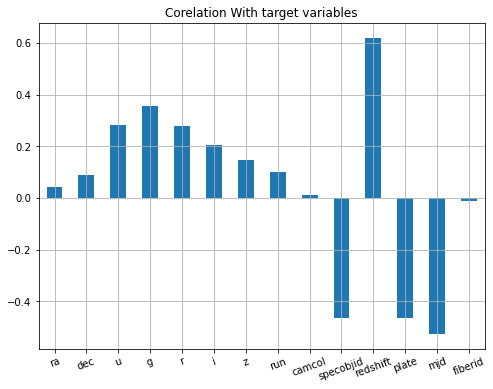

In [93]:
#The other way to check corelation and understand the relation with target column in better way
plt.figure(figsize=(8,6))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Corelation With target variables')

As from above observation we can clearly see that redshift is highly positive corelated with target variable class.
Also njd is highly negative corelated with target varible class.

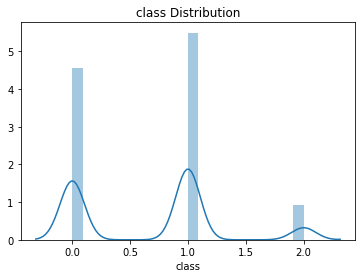

In [94]:
#Checking how my target variable distributed
sns.distplot(df['class'])
plt.title("class Distribution")
plt.show()

As per above observation we can see that the target colum class is not normally distributed and the highest no is galaxy
present in the target column as compare to star and QSO.

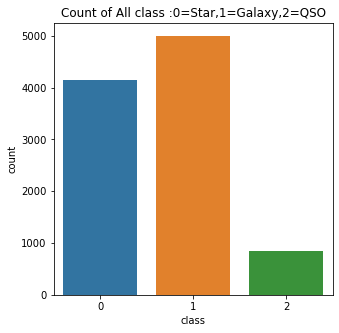

In [95]:
#Checking count of my target varibles
plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.title("Count of All class :0=Star,1=Galaxy,2=QSO")

plt.show()

Again we can see that the count of galaxy is higher than star and QSO in the dataset.
GALAXY - 4998
STAR -  4152
QSO -   850

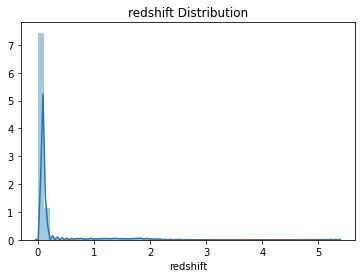

In [96]:
#Checking Distribution of highest +ve corelated column with targetvariable
sns.distplot(df['redshift'])
plt.title("redshift Distribution")
plt.show()

We can see that redshift column which is highly positive corelated with target variable is also not normally distributed.
Aslo the maximum data lies between 0 and 1 in column redshift.

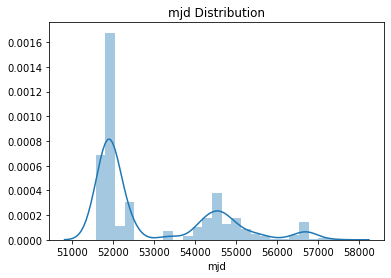

In [97]:
#Checking Distribution of highest -ve corelated variable with target variable
sns.distplot(df['mjd'])
plt.title("mjd Distribution")
plt.show()

As per above graph we can observe that the data is spread and range is very high. Data is not normally distributed and
maximum density of data lies between 54000 to 56000 and highest datapoint is at 52000.

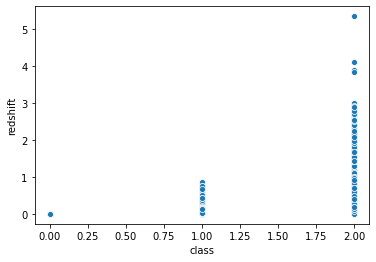

In [98]:
#Checking class distribution along redshift
sns.scatterplot(x="class",y="redshift",data=df)

As per above plot we can see that there is positive corelation between two columns redshift and class. In this we can see that 
the QSO touches highest point as comapre to star and galaxy. It suggest that the class star has only 0 value and for galaxy it 
lies between 0 to 1 however for QSO the data is distributed from 0 to more than 5 and also some datapoints are present at big distance which must be outliers.

<function matplotlib.pyplot.show(*args, **kw)>

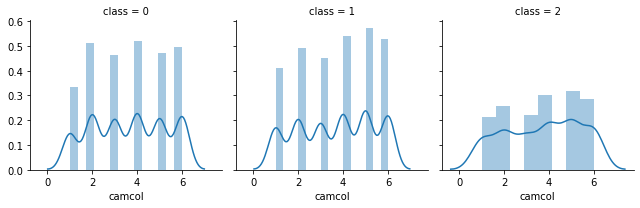

In [99]:
facet =sns.FacetGrid(df,col="class")
facet.map(sns.distplot,"camcol")
plt.show

the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and the field number.As per
above plot we can see that the camcol is not normally distributed and for class star it lies between 1 to 6 and for galaxy
it ranges from 1 to 6 and for QSO it ranges from 2 to 6.

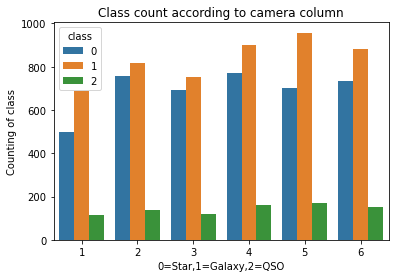

camcol  class
1       1        687
        0        497
        2        114
2       1        818
        0        758
        2        136
3       1        752
        0        690
        2        118
4       1        901
        0        772
        2        161
5       1        957
        0        700
        2        170
6       1        883
        0        735
        2        151
Name: class, dtype: int64


In [100]:
sns.countplot(x="camcol",hue="class",data=df)
plt.title("Class count according to camera column")
plt.xlabel("0=Star,1=Galaxy,2=QSO")
plt.ylabel("Counting of class")
plt.show()

print(df.groupby('camcol')['class'].value_counts())

We can see the count of each class for each camcol value ranging from 1 to 6. I am using camcol columns to see the that which
class is maximum in the particular column.

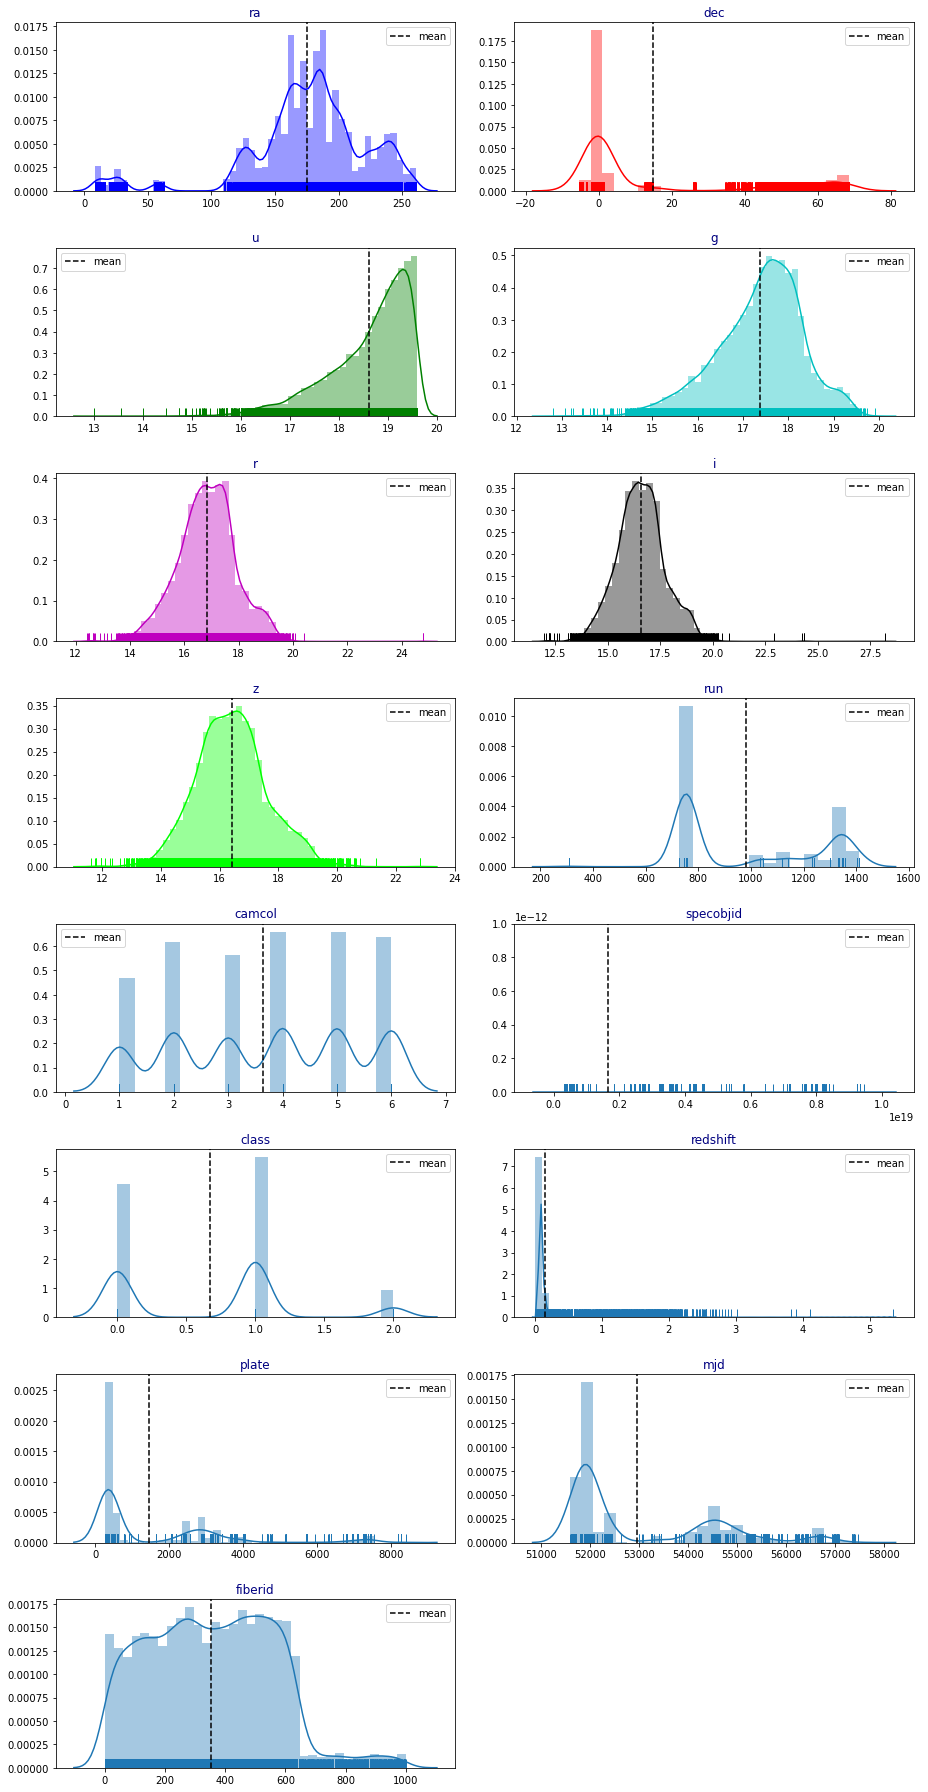

In [101]:
#Checking normal distribution of each columns present in the dataset
import warnings
warnings.filterwarnings('ignore')
import itertools

cols = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'specobjid','class', 'redshift', 'plate', 'mjd', 'fiberid']
length = len(cols)

cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")
    plt.tight_layout()


After observing above result which give us the information about each of columns present in the dataset that the data in the 
dataset is normally distributed or skewed. as we have senn earlier as well that there is both +ve and -ve skewness present in
the dataset so as per above resultit confirm and we have treat and remove the skewnees present in the dataset.

In [102]:
#Checking skewness
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [108]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

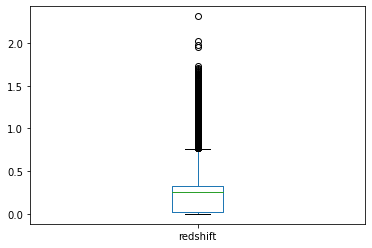

In [50]:
#Plotting Outliers
df['redshift'].plot.box()

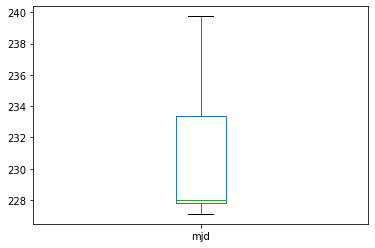

In [51]:
df['mjd'].plot.box()

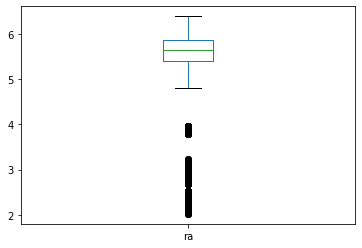

In [53]:
df['ra'].plot.box()

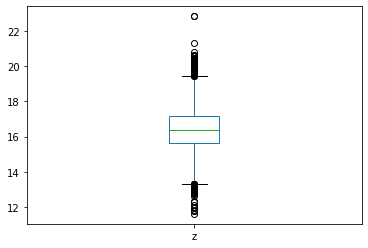

In [56]:
df['z'].plot.box()

So from above observation we can see that there is outliers present in the dataset so we have to remove outliers for 
better model building .

<h2>
Data Preparing For Model Building
</h2>

In [109]:
#Outliers detection by zscore method
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold =3
new_df = df[(z<3).all(axis=1)]
new_df

,ra,dec,u,g,r,i,z,run,camcol,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,3.722360e+18,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,3.638140e+17,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,3.232740e+17,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,3.722370e+18,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,5.033460e+17,1,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,5.033450e+17,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,5.033400e+17,1,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,5.033400e+17,1,0.014019,447,51877,229


In [110]:
df.shape

(10000, 15)

In [112]:
#Percentage Loss of data after removing outliers
percentage_loss=((10000-8698)/10000)*100
percentage_loss

13.020000000000001

In [113]:
#IQR Method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

ra           4.417633e+01
dec          3.618843e+01
u            1.081197e+00
g            1.195045e+00
r            1.339343e+00
i            1.404845e+00
z            1.523162e+00
run          5.790000e+02
camcol       3.000000e+00
specobjid    2.542375e+18
class        1.000000e+00
redshift     9.249761e-02
plate        2.258000e+03
mjd          2.568000e+03
fiberid      3.232500e+02
dtype: float64


In [114]:
df_new1 = df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(8002, 15)


So we can see that in Zscore my data percentage is very low as compare to IQR method. However the acceptable percentage loss
of data is 5% around but my dataset is big and consist 8698 rows after removal of outliers so i will proceed with removing
potliers by zscore method.

In [115]:
#Seprating independent and target variable
x= new_df.drop("class",axis=1)
y= new_df["class"] #Target variable

In [116]:
x.shape

(8698, 14)

In [117]:
y.shape

(8698,)

In [121]:
y = y.reshape(-1,1)
y.shape

(8698, 1)

In [122]:
#Linear Dimensionality Reduction:- This will combine maximum columns less corelated into minimun good related columns
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x= pca.fit_transform(x)
x.shape

(8698, 10)

In [123]:
#Scaling the dataset to minimize the distances in the dataset for better train the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [124]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

<h2>
Train and Test The Model
</h2>

In [129]:
#Finding best random state
#Finding Best Random State

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = accuracy_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    




Best Accuracy 97.19540229885058 found on random_state 182


In [130]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 182,stratify=y )

In [135]:
#Importing some important model library
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [136]:
#Using gridsearchcv to find out the best parameters in KNeighborsClassifier
parameters = {'n_neighbors':range(22,25)}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [137]:
#Models with its best parameters
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()

In [140]:
#All algorithm by using for loop
model = [SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score Of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print('\n')
    
    

Accuracy Score Of  SVC() is :
0.9683908045977011
[[690  12   1]
 [ 31 922   2]
 [  2   7  73]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       703
           1       0.98      0.97      0.97       955
           2       0.96      0.89      0.92        82

    accuracy                           0.97      1740
   macro avg       0.96      0.95      0.95      1740
weighted avg       0.97      0.97      0.97      1740

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Accuracy Score Of  DecisionTreeClassifier() is :
0.9419540229885057
[[661  41   1]
 [ 35 911   9]
 [  3  12  67]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       703
           1       0.95      0.95      0.95       955
           2       0.87      0.82      0.84        82

    accuracy                           0.94      1740
   macro avg       0.92      0.90

In [141]:
#Cross validate the models
models = [SVC,DecisionTreeClassifier(),KNN]
for m in models:
    score = cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("model:",m)
    print("score",score)
    print("mean score:",score.mean())
    print("standard deviation:",score.std())
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print('\n')


model: SVC()
score [0.97241379 0.96436782 0.97356322 0.95287356 0.96551724 0.96436782
 0.94827586 0.96206897 0.97928654 0.96202532]
mean score: 0.9644760128566328
standard deviation: 0.008802876493628826
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


model: DecisionTreeClassifier()
score [0.94712644 0.94252874 0.95287356 0.92528736 0.93218391 0.95057471
 0.91724138 0.93678161 0.94706559 0.95166858]
mean score: 0.9403331878364615
standard deviation: 0.011513332007191504
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


model: KNeighborsClassifier(n_neighbors=22)
score [0.96551724 0.93678161 0.94137931 0.93218391 0.9183908  0.93333333
 0.9045977  0.93448276 0.95166858 0.93210587]
mean score: 0.9350441120061375
standard deviation: 0.01572421966063044
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>




From above all observation I found that SVC giving best score with accuracy score of 96.83% at the same time cross_val_score is
96.44%. Now i will use some boosting technique to boostup the score and then i will deside that which i will select and save.

<h2>
Using Ensemble Technique To Boostup Our Score
</h2>

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [144]:
#using for loop working with all algorithm at one time
model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score Of ",m,"is :")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print('\n')
    
    

Accuracy Score Of  RandomForestClassifier() is :
0.9655172413793104
[[686  16   1]
 [ 30 922   3]
 [  1   9  72]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       703
           1       0.97      0.97      0.97       955
           2       0.95      0.88      0.91        82

    accuracy                           0.97      1740
   macro avg       0.96      0.94      0.95      1740
weighted avg       0.97      0.97      0.97      1740

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Accuracy Score Of  AdaBoostClassifier() is :
0.8810344827586207
[[576 124   3]
 [ 64 886   5]
 [  1  10  71]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       703
           1       0.87      0.93      0.90       955
           2       0.90      0.87      0.88        82

    accuracy                           0.88      1740
   macro avg      

In [145]:
#Cross validate the models
models = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score = cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("model:",m)
    print("score",score)
    print("mean score:",score.mean())
    print("standard deviation:",score.std())
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print('\n')


model: RandomForestClassifier()
score [0.97471264 0.96091954 0.96896552 0.95057471 0.96206897 0.95517241
 0.95057471 0.95862069 0.97928654 0.96317606]
mean score: 0.9624071796092748
standard deviation: 0.009104732034254333
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


model: AdaBoostClassifier()
score [0.8862069  0.88735632 0.91264368 0.87471264 0.9183908  0.91149425
 0.86091954 0.85632184 0.90333717 0.86766398]
mean score: 0.8879047127759481
standard deviation: 0.021560667804600833
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


model: GradientBoostingClassifier()
score [0.97241379 0.95517241 0.96321839 0.95172414 0.95632184 0.96321839
 0.95402299 0.96206897 0.97813579 0.95742232]
mean score: 0.9613719032313532
standard deviation: 0.007980463733728259
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


model: BaggingClassifier()
score [0.9689

In [ ]:
After using all techniques i found that the ther are two models are working well with both accuracy_score and cross_val_score
and minimu diffrence between both scores. Models are  = Support vector classifier(SVC) and Random Forest classifier.

SVC:- 
Accuracy_Score = 0.9683908045977011
cross_val_score = 0.9644760128566328
difference =      0.003914791741068346

RFC:-
Accuracy_Score = 0.9655172413793104
cross_val_score = 0.9624071796092748
difference = 0.003110061770035588

I will use Random Forest Classifier() as the difference between accuracy score and cross val score is lower than the diffrence
in Support vector classifier.

In [148]:
#Hyperparameter Tuning by using GridSearchCV to find best parameters so my model performs at his best
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features': ['auto', 'sqrt'],'n_estimators':[100,200,300],'bootstrap':[True, False]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 300}


In [149]:
#using the finded parameters creating and testing the model
rfc = RandomForestClassifier(bootstrap=True,max_features='auto',n_estimators=300)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc= rfc.predict(x_test)
print(accuracy_score(y_test,predrfc)*100)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))


96.55172413793103
[[688  14   1]
 [ 30 922   3]
 [  2  10  70]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       703
           1       0.97      0.97      0.97       955
           2       0.95      0.85      0.90        82

    accuracy                           0.97      1740
   macro avg       0.96      0.93      0.94      1740
weighted avg       0.97      0.97      0.97      1740



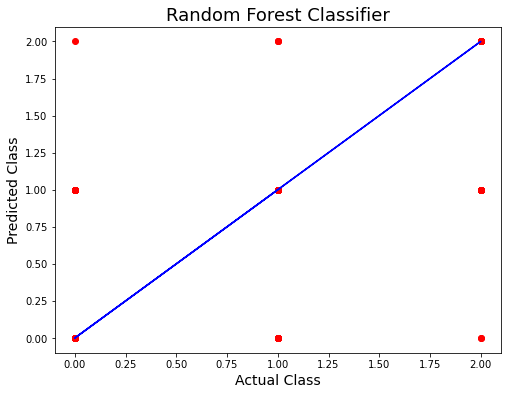

In [150]:
#Plotting figure to see the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrfc,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Class",fontsize = 14)
plt.ylabel("Predicted Class",fontsize =14)
plt.title('Random Forest Classifier',fontsize=18)
plt.show()

I have not used Logistic regression and ROC_AUC curve as i have multiclass format and 3 labels present in the dataset.
I have not used MultinomialNB as -ve data present in the dataset and i am grtting error as it doesnot support -ve input value.

<h2>
Saving The Model
</h2>

In [154]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(rfc,'rfcfile.obj')

['rfcfile.obj']

In [155]:
#Loading to see my model
rfc_from_joblib = joblib.load('rfcfile.obj')
rfc_from_joblib

RandomForestClassifier(n_estimators=300)

In [156]:
x_predict=rfc_from_joblib.predict(x_test)
x_predict

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [157]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(x_predict, columns=['Predictions']).to_csv('Class_Prediction.csv')

# END OF PROJECT